# Project VI - Solution of Initial Value Problems

---

**Students:** Chloë Geller, Zachary Crandall, Carlos Fuentes, Jessica Quiroz Galvez, Austin Wauters

MAP 4384\
Professor Borges

---

In [1]:
# All libraries will be imported in this cell
import time
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve as fs
from tabulate import tabulate as table

In [2]:
global x0, steps, gamma, omega

Consider the initial-value-problem:

$$
\begin{align*}
x^{''}(t)+2\gamma x^{'}+\omega^{2} x(t)=0 \\
x(0)=x_0 \\ 
x^{'}(0)=\gamma x_0
\end{align*}
$$

with $0 < \gamma < \omega$. It's solution is given by
$$x(t)=x_0 e^{-\gamma t} \cos(\beta t)$$

where $\beta = \sqrt{\omega^{2}-\gamma^{2}}$. This equation can be written as a first order system, with $x^{'}=y$, and $y^{'}=-2\gamma y - \omega^2 x$.

## Your task

### Explicit Midpoint

Implement the Explicit Midpoint method (EMP) doing
$$\frac{x_{n+1}−x_{n−1}}{2h}=y_n\\
\frac{y_{n+1}−y_{n−1}}{2h}=−2\gamma y_n− \omega^2x_n $$

### Implicit Midpoint

Implement the Implicit Midpoint method (IMP) doing
$$ \frac{x_{n+1}−x_n}{h}=\frac{y_{n+1}+y_n}{2}\\
\frac{y_{n+1}−y_n}{h}=−2\gamma \frac{y_{n+1}+y_n}{2}−\omega^2\frac{x_{n+1}+x_n}{2}$$

### Non-Standard Implicit Midpoint

Implement the Non-standard Implicit Midpoint method (NSIMP) doing
$$\frac{x_{n+1}−e^{−\gamma h}x_n}{h}=\frac{y_{n+1}+e^{−\gamma h}y_n}{2}\\
\frac{y_{n+1}−e^{−\gamma h}y_n}{h}=−\omega^2\frac{x_{n+1}+e^{−\gamma h}x_n}{2}$$

 - All three methods are second order and they do not differ much in terms of computational cost; demonstrate this numerically.  I expect several table with the results.

 - For $\gamma=0$  the  implicit  methods  are  equivalent,  and  we  expect  they  are  superior  to  the explicit method; check this numerically using long time simulations with varioush, $\omega$, $x_0$.

- Experiment on the long-time accuracy of the methods for small values of $\gamma>0$.

- Run experiments to help you fully understand what happens to the approximations as $\gamma$ increases.

- If there is, in fact, a ’breaking point’ for any method as $\gamma$ increases determine what it is and how it depends upon $h$ or $\omega$.

## Introduction

For this computer project, we will be utilizing the concept of Euler’s method to approximate the solution to the given initial value problem for a second order differential equation. The general concept of Euler’s method is to generate an iterated list of points that would be approximately close to the exact solution to the differential equation. The solution to a differential equation is a function that satisfies the equation. The idea for solving higher order differential equations using Euler’s method is to convert the given second order system into two first order equations. 

In addition, Euler’s method involves picking a step size for each point we generate when computing approximations points. With this in mind, we can introduce the concept of Midpoint Methods. These methods use slope estimates at the midpoint interval. These methods will be implemented into Euler’s method to improve our generated iterated list of points with each midpoint method.

## Midpoint Methods

For this project, we will be given two general initial conditions that the solution curve must go through. We are given three different midpoint methods to approximate the exact solution of $x(t)= x_0e^{-\gamma t}\cos(\beta t)$ for the initial value problem.

The code used to implement the three midpoint methods given was written in Python. Python has an extensive range of standard libraries, some of which are useful to solve numerical analysis problems. For this project, we imported the following four libraries:
- **NumPy**: Python library that allows us to work easily with n-dimensional arrays.
- **Matplotlib**: Python library that creates visual representations of numerical results.
- **SciPy**: Python library that uses NumPy arrays to provide solvers for scientific computing.
    - In this code we use the solver `fsolve` which returns the roots of a function.
- **Tabulate**: Python library used to create tables with given numerical results.

### Explicit Midpoint Method

For the **Explicit Midpoint Method** (EMP), we used the first equation given to us and solved for $x_{n+1}= x_{n-1}+2hy_n$, and for the second equation given we solved for $y_{n+1}= y_{n-1}-4\gamma hy_n-2\omega^2hx_n$. In the code, we created two arrays, `xl` to store the $x$’s and `y` to store the $y$’s which are the first derivatives of the $x$’s. The arrays are first initialized to zero and we calculate $x'(0) = \gamma x_0$. Then we set the first element of the arrays according to our initial values given. Afterwards, the code iterates through the number of steps inputted and calculates and stores the `xl` and the `y` arrays using the equations previously mentioned. This method returns the `xl` array.



In [3]:
def mid_point():    
    y = np.zeros(steps+1)
    xl = np.zeros(steps+1)
    
    xp0 = x0 * gamma
    
    xl[0] = x0
    y[0] = xp0
    
    for i in range(0, steps):
        if i == 0:
            xl[i+1] = 2 * h * y[i]
            y[i+1] = -4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
        else:
            xl[i+1] = xl[i-1] + 2*  h * y[i]
            y[i+1] = y[i-1] - 4 * gamma * h * y[i] - 2 * omega**2 * h * xl[i]
    return xl


### Implicit Midpoint Method

For the **Implicit Midpoint Method** (IMP), we used the equations given and set them equal to zero, 
$$0 = \frac{y_{n+1}+ y_n}{2} - \frac{x_{n+1}-x_n}{h}  \quad \quad \&\quad \quad 0 = -2\gamma \frac{y_{n+1}+ y_n}{2}-\omega^2\frac{x_{n+1}+ x_n}{2}- \frac{y_{n+1}+ y_n}{h}$$

In the code, we store these two equations in the method `IMP()`. Then, in the `implicit_mid_method()`, we iterate through the number of steps given and implement `fsolve`, which calls `IMP()` and solves the system of equations of two equations and two unknowns ($x$ and $x’$), filling out the array of $x$’s called `traj`. This method returns the `traj` array.


In [4]:
def IMP(p):
    X, Y = p
    
    deriv = np.array([0., 0.])
    deriv[0] = (Y + x_imp[1]) / 2 - (X - x_imp[0]) / h
    deriv[1] = -2 * gamma * (Y + x_imp[1]) / 2 - omega**2 * (X + x_imp[0]) / 2 - (Y - x_imp[1]) / h
    
    return deriv

def implicit_mid_point():    
    global x_imp
    x_imp = np.array([x0, xp0])
    traj = x_imp

    for i in range(1, steps+1):
        x_new = fs(IMP, x_imp) 
        traj = np.vstack([traj, x_new])
        x_imp = x_new
    
    return traj


### Non-Standard Implicit Midpoint Method

The **Non-standard Implicit Midpoint Method** (NSIMP) works in a similar way as IMP. We use the equations given and set them equal to zero,
$$0 = \frac{y_{n+1}+ e^{-\gamma h}y_n}{2}-\frac{x_{n+1}-e^{-\gamma h}x_n}{h} \quad \quad \& \quad \quad 0 = -\omega^2 \frac{x_{n+1}+ e^{-\gamma h}x_n}{2}- \frac{y_{n+1}- e^{-\gamma h}y_n}{h}$$  
In the code, we store these two equations in the method `NSIMP()`. Then, on the `ns_implicit_mid()` method, we iterate through the number of steps given and implement `fsolve`, which calls `NSIMP()` and solves the system of equations of two equations and two unknowns ($x$ and $x’$), filling out the array of $x$’s called `traj`. This method also returns the `traj` array.


In [5]:
def NSIMP(p):
    X, Y = p
    deriv = np.array([0., 0.])
    deriv[0] = (Y + np.exp(-gamma * h) * x_nsimp[1]) / 2 - (X - np.exp(-gamma * h) * x_nsimp[0]) / h
    deriv[1] = -omega**2 * (X + np.exp(-gamma * h) * x_nsimp[0]) / 2 - (Y - np.exp(-gamma * h) * x_nsimp[1]) / h
    
    return deriv

def ns_implicit_mid(): 
    global x_nsimp
    x_nsimp = np.array([x0, xp0])
    traj = x_nsimp

    for i in range(1, steps+1):
        x_new = fs(NSIMP, x_nsimp) 
        traj = np.vstack([traj, x_new])
        x_nsimp = x_new
    
    return traj

In addition to the three midpoint methods, we also implemented a function to find the exact solution of the initial value problem and a function to find the relative error of the midpoint methods. In the main method, there are four global variables that we reference in each midpoint method: `t0`, `h`, `xp0`, and `t`. 

Furthermore, all three midpoint methods are called in the `main()` and we are able to run simulations using various. The solutions for explicit methods depend on previous variables, while the solutions for implicit methods depend on solving a system of equations. Thus, when $\gamma=0$, we expect to see both **IMP** and **NSIMP** to have a smaller error closer to zero than the EMP since they are superior. The error is calculated using the `relative_error` function. 

Finally, the estimated solutions and the error are plotted at each step. We will run experiments on the methods by increasing $\gamma$, but staying lower than $\omega$, while analyzing their accuracy. We might encounter some breaking points along the way as increases, depending on the or used in the simulations. Plotting the graphs and outputting a table with the results for each simulation will allow us to draw conclusions for the three different midpoint methods.


In [6]:
def exact():
    y = np.zeros(steps+1)
    b = np.sqrt((omega**2) - (gamma**2))
    
    for i in range(0, (steps+1)):
        y[i] = x0 * np.exp(-gamma * t[i]) * np.cos(b * t[i])
    return y

def relative_error(exact, approx, steps):
    rel = np.zeros((steps+1,))
    
    for i in range(0, steps+1):
        rel[i] = abs(exact[i] - approx[i]) / abs(exact[i])
        
    return rel

In [7]:
def results(t, x_m, x_i, x_n, err1, err2, err3, x_ex):
    return list(zip(range(t.shape[0]), t, x_m, x_i, x_n, err1, err2, err3, x_ex))

In [8]:
def main():
    global t0, h, xp0, t

    t0 = 0
    tf = 1
    h = (tf - t0) / steps
    xp0 = x0 * gamma
    t = np.arange(t0, tf + h, h)

    x_m = mid_point()
    x_i = implicit_mid_point()
    x_n = ns_implicit_mid()
    x_ex = exact()

    error_mid = relative_error(x_ex, x_m, steps)
    error_imp = relative_error(x_ex, x_i[:,0], steps)
    error_nsimp = relative_error(x_ex, x_n[:,0], steps)
    error_exact = relative_error(x_ex, x_ex, steps)
    
    title1 = "Exact solution and methods: gamma=" + str(gamma) + ", omega=" + str(omega) + ", h=" + str(h)
    plt.figure(figsize=(8, 6))
    plt.plot(t, x_ex, "limegreen", label="Exact Solution", linewidth=5.5)
    plt.plot(t, x_m, "cornflowerblue", label="EMP")
    plt.plot(t, x_i[:,0], "blueviolet", marker="o", label="IMP")
    plt.plot(t, x_n[:,0], "darkorange", label="NSIMP")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title1)
    plt.legend(loc="upper right", fontsize="small")
    plt.savefig("./plots/"+title1+".png")
    plt.show()
    
    title2 = "Errors: gamma=" + str(gamma) + ", omega=" + str(omega) + ", h=" + str(h)
    plt.figure(figsize=(8,6))
    plt.plot(t, error_exact, "limegreen", label="Exact Error", linewidth=5.5)
    plt.plot(t, error_mid, "cornflowerblue", label="EMP Error")
    plt.plot(t, error_imp, "blueviolet", marker="o", label="IMP Error")
    plt.plot(t, error_nsimp, "darkorange", label="NSIMP Error")
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title2)
    plt.legend(loc="upper right", fontsize="small")
    plt.savefig("./plots/"+title2+".png")
    plt.show()
    

    print()
    print(f"Testing using: steps = {steps}, x0 = {x0}, gamma = {gamma}, omega = {omega}, and h = {h}.", end="\n\n\n\n")
    table_results = results(t, x_m, x_i[:,0], x_n[:,0], error_mid, error_imp, error_nsimp, x_ex)
    print(table(table_results, headers=["n", "t", "EMP", "IMP", "NSIMP", "EMP Error", "IMP Error", "NSIMP Error", "Exact Solution"]))
    print()
    print()
        
    return

## Numerical Results

Before starting our analysis, we tested some initial values as a basis to gather an idea on how each midpoint method approximates the exact solution to our initial value problem. For the following tables, variable `n` will indicate the number of iterations.

| n    | EMP       | IMP       | NSIMP     | EMP Error  | IMP Error | NSIMP Error | Exact Solution |
|------|-----------|-----------|-----------|------------|-----------|-------------|----------------|
| 10   | 0\.442293 | 0\.645931 | 0\.565618 | 0\.102301  | 0\.311013 | 0\.148005   | 0\.492696      |
| 25   | 0\.120508 | 0\.645357 | 0\.56512  | 0\.755411  | 0\.309848 | 0\.146995   | 0\.492696      |
| 50   | 0\.513067 | 0\.645275 | 0\.565049 | 0\.0413464 | 0\.309682 | 0\.146851   | 0\.492696      |
| 100  | 0\.521725 | 0\.645255 | 0\.565031 | 0\.0589178 | 0\.30964  | 0\.146815   | 0\.492696      |
| 1000 | 0\.529489 | 0\.645248 | 0\.565025 | 0\.0746773 | 0\.309626 | 0\.146803   | 0\.492696      |

**Table 1**: $\omega=1$, $\gamma=0.1$, and $x_0=1$.


We picked these initial values to have our code run during a time interval of 0 to 1. Based on the computations and errors in **Table 1**, we see that **EMP** had a better estimation to the exact solution, but the error grew at different steps as the number of steps grew. 


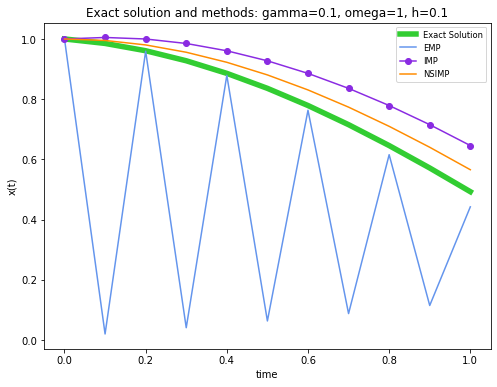

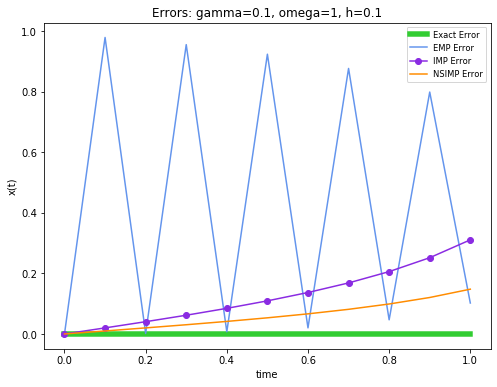


Testing using: steps = 10, x0 = 1, gamma = 0.1, omega = 1, and h = 0.1.



  n    t        EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ---  ---------  --------  --------  -----------  -----------  -------------  ----------------
  0  0    1          1         1          0             0             0                   1
  1  0.1  0.02       1.00494   0.994988   0.979699      0.0200833     0.00998282          0.985153
  2  0.2  0.9592     0.999854  0.98015    0.00172211    0.0405878     0.0200813           0.960855
  3  0.3  0.040832   0.984994  0.955829   0.955978      0.0619517     0.0305077           0.927532
  4  0.4  0.879199   0.9607    0.922456   0.00733363    0.0846864     0.0415059           0.885694
  5  0.5  0.0632308  0.927398  0.880542   0.924358      0.10943       0.0533769           0.835923
  6  0.6  0.763134   0.885594  0.830674   0.0202012     0.137027      0.0665156           0.778868
  7  0.7  0.0877429  0.835868  0.773509 

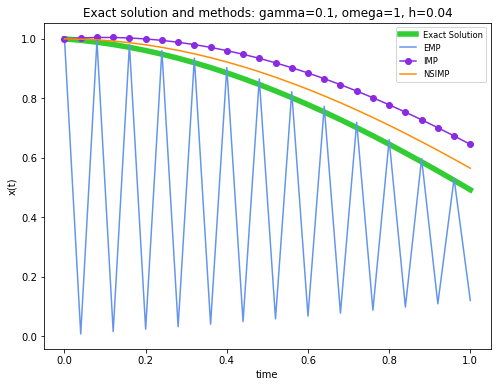

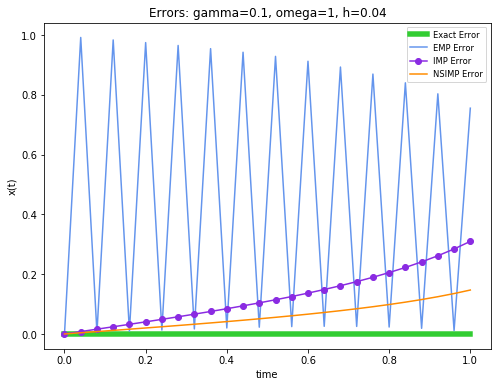


Testing using: steps = 25, x0 = 1, gamma = 0.1, omega = 1, and h = 0.04.



  n     t        EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ---------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1          1         1          0             0             0                   1
  1  0.04  0.008      1.00319   0.999194   0.991962      0.008005      0.00399378          0.995219
  2  0.08  0.993472   1.00475   0.996787   0.00463265    0.0160358     0.00798457          0.988891
  3  0.12  0.0160532  1.0047    0.992795   0.983636      0.0241183     0.011985            0.981037
  4  0.16  0.980457   1.00305   0.987238   0.00902985    0.0322788     0.0160081           0.971683
  5  0.2   0.024212   0.999812  0.980136   0.974802      0.0405447     0.020067            0.960855
  6  0.24  0.961036   0.99501   0.971514   0.0131296     0.0489449     0.0241755           0.948582
  7  0.28  0.0325265  0.988661

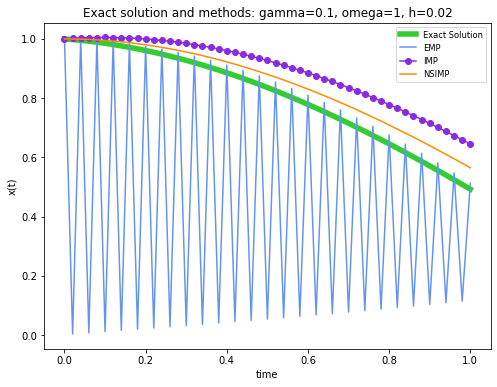

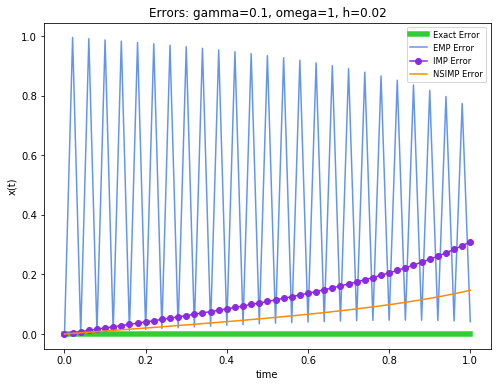


Testing using: steps = 50, x0 = 1, gamma = 0.1, omega = 1, and h = 0.02.



  n     t         EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1           1         1          0            0              0                   1
  1  0.02  0.004       1.0018    0.999798   0.995991     0.00400061     0.00199821          0.997804
  2  0.04  0.998368    1.00319   0.999194   0.00316387   0.00800442     0.00399402          0.995219
  3  0.06  0.00800666  1.00417   0.99819    0.991931     0.0120146      0.005989            0.992247
  4  0.08  0.995107    1.00475   0.996787   0.00628557   0.0160344      0.00798473          0.988891
  5  0.1   0.0120266   1.00492   0.994988   0.987792     0.0200669      0.0099828           0.985153
  6  0.12  0.990221    1.0047    0.992795   0.0093612    0.0241156      0.0119848           0.981037
  7  0.14  0.0160664 

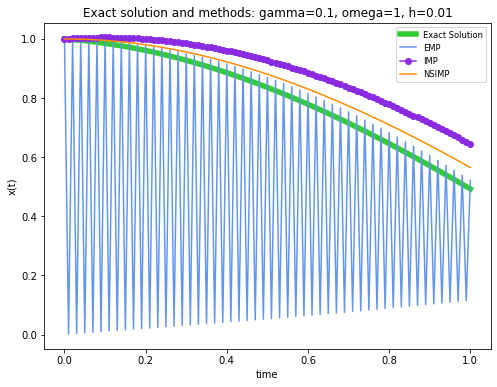

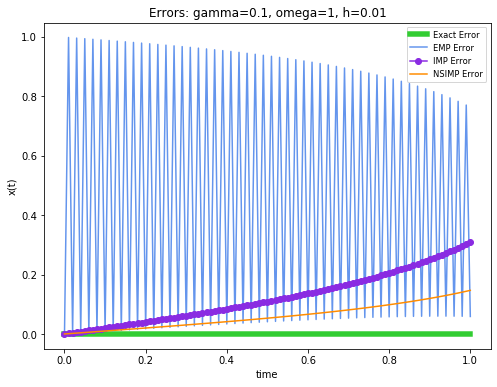


Testing using: steps = 100, x0 = 1, gamma = 0.1, omega = 1, and h = 0.01.



  n     t         EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
---  ----  ----------  --------  --------  -----------  -----------  -------------  ----------------
  0  0     1           1         1          0            0             0                    1
  1  0.01  0.002       1.00095   0.99995    0.997998     0.00200008    0.000999525          0.998951
  2  0.02  0.999592    1.0018    0.999798   0.00179153   0.00400055    0.00199825           0.997804
  3  0.03  0.00400083  1.00254   0.999546   0.995985     0.00600182    0.00299637           0.99656
  4  0.04  0.998776    1.00319   0.999194   0.00357399   0.00800427    0.00399408           0.995219
  5  0.05  0.00600333  1.00373   0.998742   0.993959     0.0100083     0.00499158           0.993781
  6  0.06  0.997553    1.00417   0.99819    0.0053471    0.0120144     0.00598906           0.992247
  7  0.07  0.00800831

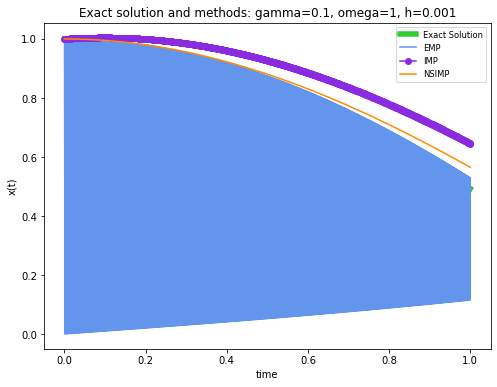

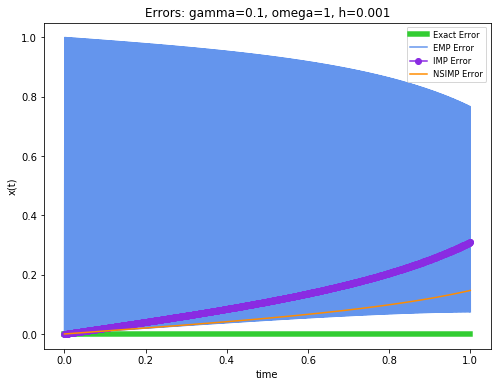


Testing using: steps = 1000, x0 = 1, gamma = 0.1, omega = 1, and h = 0.001.



   n      t          EMP       IMP     NSIMP    EMP Error    IMP Error    NSIMP Error    Exact Solution
----  -----  -----------  --------  --------  -----------  -----------  -------------  ----------------
   0  0      1            1         1         0            0              0                    1
   1  0.001  0.0002       1.0001    0.999999  0.9998       0.0002         9.9995e-05           0.9999
   2  0.002  0.999996     1.0002    0.999998  0.00019792   0.000400001    0.00019998           0.999798
   3  0.003  0.000400001  1.0003    0.999995  0.9996       0.000600002    0.000299956          0.999696
   4  0.004  0.999988     1.00039   0.999992  0.000395758  0.000800004    0.000399922          0.999592
   5  0.005  0.000600003  1.00049   0.999987  0.9994       0.00100001     0.000499879          0.999488
   6  0.006  0.999976     1.00058   0.999982  0.000593516  0.00120001     0.000599827          0.

In [9]:
# These are our initial values
steps = 10
x0 = 1
gamma = 0.1
omega = 1
main()

# This is to show what happens when we increase the steps
steps = 25
main()

steps = 50
main()

steps = 100
main()

steps = 1000
main()

1. To start our analysis, we will first test how long each midpoint method takes to run.

| steps | gamma  | omega | EMP Time     | IMP Time    | NSIMP Time  |
|-------|--------|-------|--------------|-------------|-------------|
| 100   | 0\.001 | 1     | 0\.0001688   | 0\.00647235 | 0\.00880003 |
| 100   | 0\.001 | 2     | 0\.000169992 | 0\.00654292 | 0\.00910115 |
| 100   | 0\.001 | 5     | 0\.000268221 | 0\.00750303 | 0\.00908232 |
| 100   | 0\.001 | 10    | 0\.000164032 | 0\.00719905 | 0\.00906396 |
| 100   | 0\.01  | 1     | 0\.000162125 | 0\.00760794 | 0\.00897288 |
| 100   | 0\.01  | 2     | 0\.000169992 | 0\.00796008 | 0\.009547   |
| 100   | 0\.01  | 5     | 0\.000168085 | 0\.00713873 | 0\.01038    |
| 100   | 0\.01  | 10    | 0\.000163078 | 0\.007375   | 0\.011729   |
| 100   | 0\.1   | 1     | 0\.000313044 | 0\.0212178  | 0\.02367    |
| 100   | 0\.1   | 2     | 0\.000245094 | 0\.010334   | 0\.0118721  |
| 100   | 0\.1   | 5     | 0\.000182152 | 0\.012032   | 0\.011116   |
| 100   | 0\.1   | 10    | 0\.000169039 | 0\.00875211 | 0\.010772   |
| 100   | 1      | 1     | 0\.000183821 | 0\.00730515 | 0\.0102711  |
| 100   | 1      | 2     | 0\.000209093 | 0\.00798821 | 0\.0100441  |
| 100   | 1      | 5     | 0\.00016284  | 0\.00799727 | 0\.0113139  |
| 100   | 1      | 10    | 0\.000172853 | 0\.0078361  | 0\.0121689  |


We tested the runtimes of each midpoint method with 100 iterations each, and different values for gamma and omega. Based on the table above, each method does not differ in terms of computational cost. The difference is small and negligible.


In [10]:
s = [10, 25, 50, 100]
g = [10e-4, 10e-3, 10e-2, 10e-1]
o = [1, 2, 5, 10]
times = []

for steps in s:
    for gamma in g:
        for omega in o:
            list = []
            list.append(steps)
            list.append(gamma)
            list.append(omega)
            start = time.time()
            mid_point()
            list.append(time.time() - start)
            start = time.time()
            implicit_mid_point()
            list.append(time.time() - start)
            start = time.time()
            ns_implicit_mid()
            list.append(time.time() - start)
            times.append(list)
            
print(table(times, headers=["steps", "gamma", "omega", "EMP Time", "IMP Time", "NSIMP Time"]))

/usr/local/Caskroom/miniconda/base/envs/num-methods/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


  steps    gamma    omega     EMP Time     IMP Time    NSIMP Time
-------  -------  -------  -----------  -----------  ------------
     10    0.001        1  3.71933e-05  0.00173426    0.00152302
     10    0.001        2  2.40803e-05  0.000926018   0.00103092
     10    0.001        5  2.31266e-05  0.000759602   0.00111413
     10    0.001       10  3.79086e-05  0.000738144   0.001266
     10    0.01         1  2.38419e-05  0.000756025   0.00111794
     10    0.01         2  2.69413e-05  0.000933886   0.00128198
     10    0.01         5  3.40939e-05  0.00104976    0.00133705
     10    0.01        10  4.19617e-05  0.000984669   0.00424218
     10    0.1          1  2.38419e-05  0.000770092   0.000993013
     10    0.1          2  2.47955e-05  0.00070715    0.001302
     10    0.1          5  2.38419e-05  0.000887871   0.00108123
     10    0.1         10  3.38554e-05  0.000778913   0.000967264
     10    1            1  2.19345e-05  0.000677824   0.000901222
     10    1            

2. Given that when $\gamma = 0$, both implicit methods are equivalent, and we expect both implicit methods to be superior compared to the explicit method. The following tables show computations when $\gamma = 0$, with various $\omega$, and $x_0$.

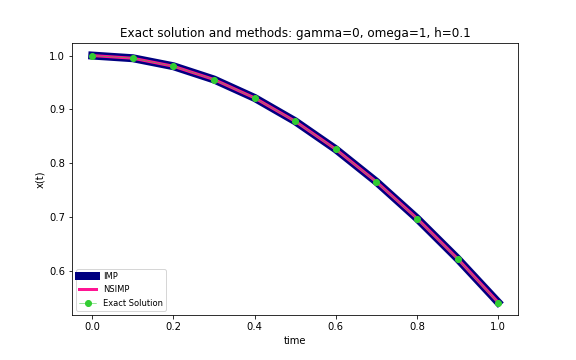



In [11]:
def gamma_0():
    global t0, h, xp0, t
    t0 = 0
    tf = 1
    h = (tf - t0) / steps
    xp0 = x0 * gamma
    t = np.arange(t0, tf + h, h)


    x_i = implicit_mid_point()
    x_n = ns_implicit_mid()
    x_ex = exact()


    error_imp = relative_error(x_ex, x_i[:,0], steps)
    error_nsimp = relative_error(x_ex, x_n[:,0], steps)
    error_exact = relative_error(x_ex, x_ex, steps)

    title1 = "Exact solution and methods: gamma=" + str(gamma) + ", omega=" + str(omega) + ", h=" + str(h)
    plt.figure(figsize=(8,5))
    plt.plot(t, x_i[:,0], "navy", label="IMP", linewidth=8)
    plt.plot(t, x_n[:,0], "deeppink", label="NSIMP",linewidth=3)
    plt.plot(t, x_ex, "limegreen", marker='o', label="Exact Solution", linewidth=0.5)
    plt.xlabel("time")
    plt.ylabel("x(t)")
    plt.title(title1)
    plt.legend(loc="lower left", fontsize="small")
    plt.savefig("./plots/"+title1+".png")
    plt.show()

    return

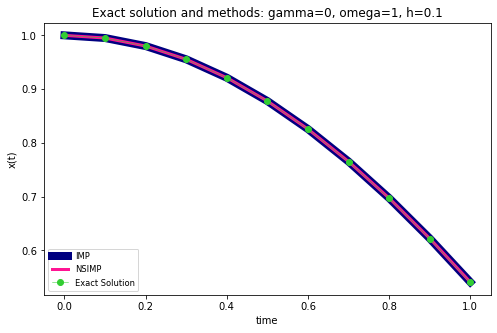

In [12]:
steps = 10
x0 = 1
gamma = 0
omega = 1
gamma_0()

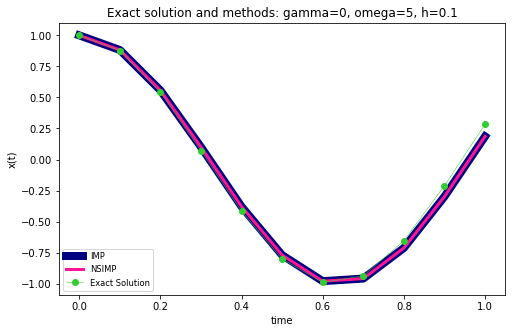

In [13]:
steps = 10
x0 = 1
gamma = 0
omega = 5
gamma_0()

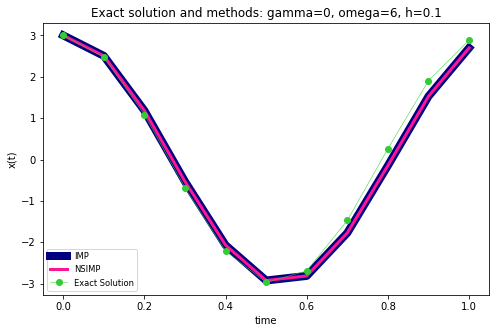

In [14]:
steps = 10
x0 = 3
gamma = 0
omega = 6
gamma_0()

In [ ]:
# This is to show what happens when we decrease gamma
steps = 100
x0 = 1
gamma = 1e-5
omega = 1
main()

In [ ]:
# This is to show what happens when we decrease gamma
steps = 100
x0 = 1
gamma = 1e-14
omega = 1
main()

In [ ]:
# This is to show what happens when we increase omega
steps = 100
x0 = 1
gamma = 1e-14
omega = 5
main()

In [ ]:
# This is to show what happens when we increase gamma towards omega
steps = 100
x0 = 1
gamma = 0.5
omega = 1
main()

In [ ]:
# This is to show what happens when we increase gamma towards omega
steps = 100
x0 = 1
gamma = 0.9
omega = 1
main()

In [ ]:
# This is to show a breaking point
# steps = 100
# x0 = 1
# gamma = 0.1
# omega = 3.14/2
# main()

In [ ]:
#### HERE'S SOME MORE OPTIONS IF YOU WANT TO INCLUDE THEM ####
# steps = 10
# x0 = 1
# gamma = 0.00001
# omega = 1
# main()

In [ ]:
# Changing gamma back to 0.1, and steps to 25: the error for EMP grew significantly (0.755411), compared to (0.102301) when steps = 10. 
# There weren't any significant changes in errors for IMP and NSIMP.
# steps = 25
# x0 = 1
# gamma = 0.1
# omega = 1
# main()

In [ ]:
# steps = 25
# x0 = 1
# gamma = 0.02
# omega = 1
# main()

In [ ]:
# steps = 50
# x0 = 1
# gamma = 0.0001
# omega = 1
# main()

In [ ]:
# When gamma <= 1e-13, we obtain the same results for IMP and NSIMP.
# steps = 50
# x0 = 1
# gamma = 1e-13
# omega = 1
# main()

In [ ]:
# steps = 50
# x0 = 1
# gamma = 1e-5
# omega = 5
# main()

In [ ]:
# steps = 50
# x0 = 1
# gamma = 1e-5
# omega = 10
# main()

In [ ]:
# steps = 100
# x0 = 1
# gamma = 1e-5
# omega = 1
# main()

In [ ]:
# steps = 100
# x0 = 1
# gamma = 1e-14
# omega = 30
# main()

In [ ]:
steps = 100
x0 = 1
gamma = 1e-14
omega = 50
main()

In [ ]:
# steps = 100
# x0 = 1
# gamma = 0.05
# omega = 1
# main()

In [ ]:
# steps = 100
# x0 = 1
# gamma = 0.5
# omega = 1
# main()

In [ ]:
# steps = 100
# x0 = 1
# gamma = 0.05
# omega = 8
# main()

In [ ]:
# steps = 1000
# x0 = 1
# gamma = 1e-14
# omega = 4
# main()

In [ ]:
# steps = 1000
# x0 = 1
# gamma = 1e-14
# omega = 20
# main()

In [ ]:
# steps = 1000
# x0 = 1
# gamma = 1e-14
# omega = 600
# main()

In [ ]:
# steps = 100
# x0 = 1
# gamma = 0.99
# omega = 1
# main()

In [ ]:
# steps = 100
# x0 = 1
# gamma = 2
# omega = 12
# main()

#### Explicit midpoint breaking points:

Odd number of steps.
Due to the nature of it's oscilation the error is extreem if the finale value it the result of on odd step

In [ ]:
## ODD
steps = 25
x0 = 1
gamma = .1
omega = 1
main()

In [ ]:
## EVEN
steps = 26
x0 = 1
gamma = .1
omega = 1
main()

When using any gamma > 0, the error diverges npi/2 < omega < npi and converges npi < omega < (n+1)pi/2. At every point it starts to diverge the rate at which it diverges increases.

In [ ]:
steps = 20
x0 = 1
gamma = .1
omega = 3.14/2
main()

In [ ]:
## error diverging and converging
steps = 100
x0 = 1
gamma = .1
omega = 12.56
main()